In [1]:
from xpc3 import *
from xpc3_helper import *

In [2]:
import numpy as np

In [3]:
import pymap3d as pm

def set_position(client, ac, e, n, u, psi, pitch=-998, roll=-998):
    ref = [37.46358871459961, -122.11750030517578, 1578.909423828125]
    p = pm.enu2geodetic(e, n, u, ref[0], ref[1], ref[2])
    client.sendPOSI([*p, pitch, roll, psi], ac)

In [4]:
client = XPlaneConnect()
client.pauseSim(True)
client.sendDREF("sim/operation/override/override_joystick", 1)

In [5]:
set_position(client, 0, 0, 1000, 0, 0)

In [8]:
set_position(client, 1, 0, 1200, 10, 90, roll=0, pitch=0)

# Interactive Position

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

In [6]:
def interact_position(e0, n0, u0, h0, e1, n1, u1, h1):
    set_position(client, 0, e0, n0, u0, h0)
    set_position(client, 1, e1, n1, u1, h1)

In [9]:
interact(interact_position,
         e0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='e0'),
         n0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='n0'),
         u0=widgets.FloatSlider(min=-500.0, max=500.0,
                                step=25, description='u0'),
         h0=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h0'),
         e1=widgets.FloatSlider(min=-2000.0, max=2000.0,
                                step=10, description='e1'),
         n1=widgets.FloatSlider(min=-2000.0, max=2000.0,
                                step=10, description='n1'),
         u1=widgets.FloatSlider(min=-300.0, max=300.0,
                                step=5, description='u1'),
         h1=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h1'))


interactive(children=(FloatSlider(value=0.0, description='e0', max=5000.0, min=-5000.0, step=500.0), FloatSlid…

<function __main__.interact_position(e0, n0, u0, h0, e1, n1, u1, h1)>

In [13]:
def sample_random_state():
    # Ownship state
    e0 = np.random.uniform(-5000.0, 5000.0) # m
    n0 = np.random.uniform(-5000.0, 5000.0) # m
    u0 = np.random.uniform(-500.0, 500.0) # m
    h0 = np.random.uniform(0.0, 360.0) # degrees

    # Info about relative position of intruder
    vang = np.random.uniform(-22.0, 22.0) # degrees
    hang = np.random.uniform(-36.0, 36.0) # degrees
    r = np.random.gamma(2, 200) # meters
    while r < 20.0:
        r = np.random.gamma(2, 200)  # meters


    # print("vang: ", vang)
    # print("hang: ", hang)
    # print("range: ", range)

    # Intruder state
    e1 = e0 + np.sin((h0 + hang) * (np.pi / 180)) * r
    n1 = n0 + np.cos((h0 + hang) * (np.pi / 180)) * r
    u1 = u0 + np.sin(vang * (np.pi / 180)) * r
    h1 = np.random.uniform(0.0, 360.0)  # degrees

    return e0, n0, u0, h0, vang, hang, r, e1, n1, u1, h1


In [18]:
e0, n0, u0, h0, vang, hang, r, e1, n1, u1, h1 = sample_random_state()
interact_position(e0, n0, u0, h0, e1, n1, u1, h1)

In [37]:
def get_intruder_position(e0, n0, u0, h0, z, hang, vang):
    e1 = z * np.tan(hang * (np.pi / 180))
    n1 = z
    u1 = z * np.tan(vang * (np.pi / 180))
    
    # Rotate
    # e1 = e1 * np.cos(h0 * (np.pi / 180)) - n1 * np.sin(h0 * (np.pi / 180))
    # n1 = e1 * np.sin(h0 * (np.pi / 180)) + n1 * np.cos(h0 * (np.pi / 180))

    n1 = z * np.cos(h0 * (np.pi / 180))
    e1 = z * np.sin(h0 * (np.pi / 180))

    n1 = (z / np.cos(hang * (np.pi / 180))) * np.cos((h0 + hang) * (np.pi / 180))
    e1 = (z / np.cos(hang * (np.pi / 180))) * np.sin((h0 + hang) * (np.pi / 180))

    # Translate
    e1 += e0
    n1 += n0
    u1 += u0

    return e1, n1, u1


In [39]:
def interact_angles(e0, n0, u0, h0, z, hang, vang, h1):
    e1, n1, u1 = get_intruder_position(e0, n0, u0, h0, z, hang, vang)
    interact_position(e0, n0, u0, h0, e1, n1, u1, h1)


interact(interact_angles,
         e0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='e0'),
         n0=widgets.FloatSlider(min=-5000.0, max=5000.0,
                                step=500, description='n0'),
         u0=widgets.FloatSlider(min=-500.0, max=500.0,
                                step=25, description='u0'),
         h0=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h0'),
         z=widgets.FloatSlider(min=0.0, max=2000.0,
                                step=10, description='z'),
         vang = widgets.FloatSlider(min=-50,max=50, step=1),
         hang=widgets.FloatSlider(min=-50, max=50, step=1),
         h1=widgets.FloatSlider(min=0.0, max=360.0, step=30, description='h1'))

interactive(children=(FloatSlider(value=0.0, description='e0', max=5000.0, min=-5000.0, step=500.0), FloatSlid…

<function __main__.interact_angles(e0, n0, u0, h0, z, hang, vang, h1)>

In [40]:
e1, n1, u1 = get_intruder_position(0, 0, 0, 0, 100, 0, 0)
e1, n1, u1

(0.0, 100.0, 0.0)

In [15]:
1080 - 1056

24

# Screenshot Testing

In [16]:
from PIL import Image

import numpy as np
import time

import matplotlib.pyplot as plt

import mss
import cv2
import os

In [17]:
screenShot = mss.mss()

In [23]:
time.sleep(2)
ss1 = np.array(screenShot.grab(screenShot.monitors[0]))
ss = cv2.cvtColor(np.array(screenShot.grab(
    screenShot.monitors[0])), cv2.COLOR_BGRA2BGR)[12:-12, :, ::-1]

In [25]:
ss.shape

(1056, 1920, 3)

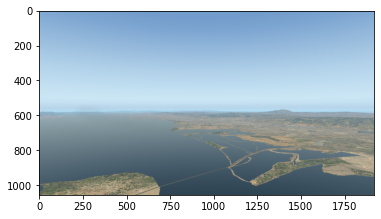

In [24]:
plt.imshow(ss)

In [122]:
cv2.imwrite('test.jpg', ss1)

True

In [123]:
jpg_im = cv2.imread('test.jpg')

In [124]:
png_im = cv2.imread('test.png')

# Center Point Testing

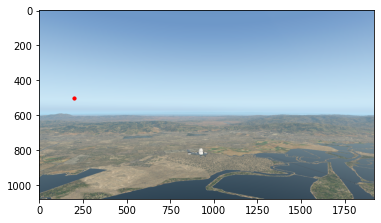

In [33]:
plt.scatter(200, 500, color="red", s=10)
plt.imshow(ss)

In [118]:
def get_center(hang, vang, maxh=40, maxv=26, w=1920, h=1080):
    
    return (hang / maxh) * (w / 2) + (w / 2), (-vang / maxv) * (h / 2) + (h / 2) + 30

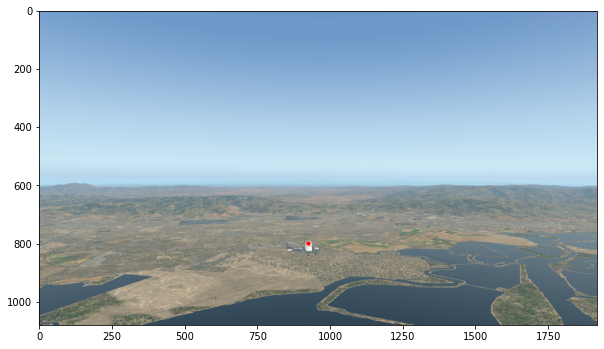

In [61]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x, y = get_center(hang, vang)
plt.scatter(x, y, color="red", s=10)
plt.imshow(ss)


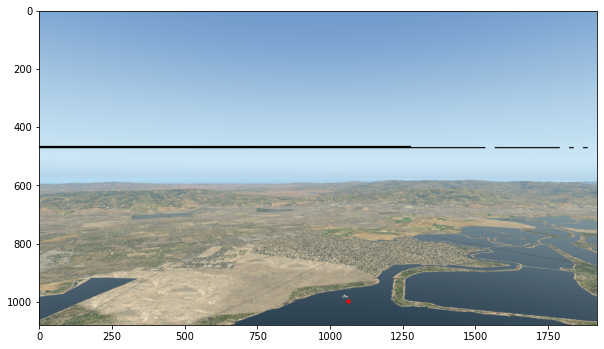

In [126]:
e0, n0, u0, h0, vang, hang, r, e1, n1, u1, h1 = sample_random_state()
interact_position(e0, n0, u0, h0, e1, n1, u1, h1)

time.sleep(2)
ss1 = np.array(screenShot.grab(screenShot.monitors[0]))
ss = cv2.cvtColor(np.array(screenShot.grab(
    screenShot.monitors[0])), cv2.COLOR_BGRA2BGR)[:, :, ::-1]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x, y = get_center(hang, vang, maxv=26.565, maxh=46)
plt.scatter(x, y, color="red", s=10)
plt.imshow(ss)


In [117]:
1080/2

540.0

# Try with coordinate systems

In [69]:
def spherical_to_cartesian(rho, phi, theta):
    x = rho * np.sin(phi) * np.cos(theta)
    y = rho * np.sin(phi) * np.sin(theta)
    z = rho * np.cos(phi)
    return x, y, z

def cartesian_to_spherical(x, y, z):
    rho = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z / rho)
    return rho, phi, theta

In [82]:
rho, phi, theta = cartesian_to_spherical(5, 4, 1)
rho, np.pi / 2 - phi, theta

(6.48074069840786, 0.1549223198708134, 0.6747409422235526)

In [93]:
def convert_to_own(e0, n0, u0, h0, e1, n1, u1):
    h0_rad = h0 * np.pi / 180
    
    # Make ownship be the origin
    x = n1 - n0
    y = -(e1 - e0) # right-handed coordinates
    z = u1 - u0

    # Rotate x and y according to ownship heading
    xrot = x * np.cos(h0_rad) - y * np.sin(h0_rad)
    yrot = x * np.sin(h0_rad) + y * np.cos(h0_rad)

    # Get angle
    
    

In [98]:
x = 2
y = 2
h0_rad = np.pi / 4
xrot = x * np.cos(h0_rad) - y * np.sin(h0_rad)
yrot = x * np.sin(h0_rad) + y * np.cos(h0_rad)

In [97]:
xrot, yrot

(2.732050807568877, 0.7320508075688775)

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(x, y, color="red", s=10)
plt.imshow(ss)

# Other Testing

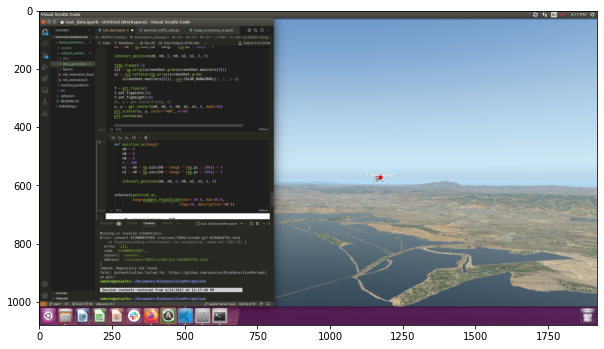

In [165]:
def get_center(hang, vang, maxh=40, maxv=26, w=1920, h=1080):
    return (hang / maxh) * (w / 2) + (w / 2), (-vang / maxv) * (h / 2) + (h / 2) + 30

def get_center2(hang, vang, maxh=40, maxv=26, w=1920, h=1080):
    hang_rad = hang * np.pi / 180
    hang_cam = np.arctan(2 * np.cos((np.pi / 2) - (hang_rad / 2)) * np.sin(hang_rad))
    hang_cam_deg = hang_cam * 180 / np.pi
    print(hang_cam_deg)
    print(hang)
    x = (hang_cam_deg / maxh) * (w / 2) + (w / 2)
    y = (-vang / maxv) * (h / 2) + (h / 2) + 30
    return x, y

def get_center3(e0, n0, u0, h0, e1, n1, u1, maxh=40, maxv=26, w=1920, h=1080):
    h0_rad = h0 * np.pi / 180

    # Make ownship be the origin
    x = n1 - n0
    y = -(e1 - e0)  # right-handed coordinates
    z = u1 - u0

    # Rotate x and y according to ownship heading
    xrot = x * np.cos(h0_rad) - y * np.sin(h0_rad)
    yrot = x * np.sin(h0_rad) + y * np.cos(h0_rad)

    hang_rad = -np.arctan2(yrot, xrot)
    hang = hang_rad * 180 / np.pi

    vang = 0

    x = (hang / maxh) * (w / 2) + (w / 2)
    y = (-vang / maxv) * (h / 2) + (h / 2) + 30
    return x, y


e0 = 0
n0 = 0
h0 = 0
r = 100
hang = 10
e1 = e0 + np.sin((h0 + hang) * (np.pi / 180)) * r
n1 = n0 + np.cos((h0 + hang) * (np.pi / 180)) * r

interact_position(e0, n0, 0, h0, e1, n1, 0, 0)

time.sleep(0.1)
ss1 = np.array(screenShot.grab(screenShot.monitors[0]))
ss = cv2.cvtColor(np.array(screenShot.grab(
    screenShot.monitors[0])), cv2.COLOR_BGRA2BGR)[:, :, ::-1]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#x, y = get_center2(hang, 0)
x, y = get_center3(e0, n0, 0, h0, e1, n1, 0, maxh=45)
plt.scatter(x, y, color="red", s=10)
plt.imshow(ss)


In [135]:
def position_ac(hang):
    e0 = 0
    n0 = 0
    h0 = 0
    r = 100
    e1 = e0 + np.sin((h0 + hang) * (np.pi / 180)) * r
    n1 = n0 + np.cos((h0 + hang) * (np.pi / 180)) * r

    interact_position(e0, n0, 0, h0, e1, n1, 0, 0)


interact(position_ac,
         hang=widgets.FloatSlider(min=-40.0, max=40.0,
                                step=10, description='e0'))

interactive(children=(FloatSlider(value=0.0, description='e0', max=40.0, min=-40.0, step=10.0), Output()), _do…

<function __main__.position_ac(hang)>